# Decision Trees and Random Forest for Regression

- [Load Boston Housing Data](#Load-Boston-Housing-Data)
- [Split Data](#Split-Data)
- [Fit a Regression Tree to the Training Data](#Fit-a-Regression-Tree-to-the-Training-Data)
- [Compute Test MSE](#Compute-Test-MSE)
- [Random-Forests---Regression](#Random-Forests---Regression)

# Regression Trees

In [1]:
import numpy as np
import pandas as pd
# import graphviz

from sklearn.tree import DecisionTreeRegressor  ##, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text

from matplotlib import pyplot as plt
from IPython.display import Image, display
%matplotlib inline
plt.style.use('ggplot')

## Load Boston Housing Data

In [2]:
df = pd.read_csv('Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


None of the predictors are categoricals so we don't need to convert any features to dummies.

In [3]:
df.shape

(506, 13)

## Split Data

In [4]:
# Get the predictors and the response values
X = df[df.columns[0:-1]].values # get all the columns except the medv
y = df['medv'].values

# The lab uses a 50/50 split. We'll do the same
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

## Fit a Regression Tree to the Training Data

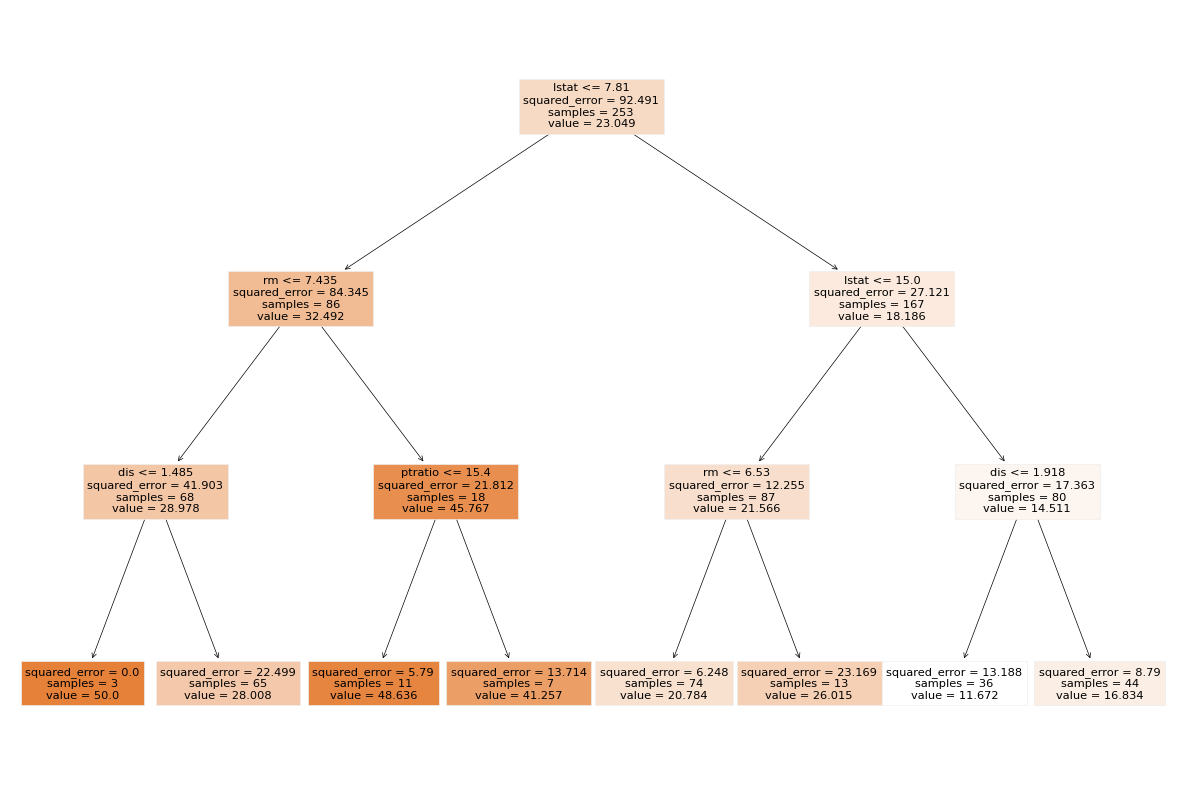

In [5]:
# plot tree
plt.figure(figsize=(15,10))  # set plot size (denoted in inches)

#criterion default=”squared_error”
tree = DecisionTreeRegressor(max_depth=3)
##tree = DecisionTreeRegressor(max_features=None, min_samples_split=20)
tree_est = tree.fit(X_train, y_train)

plot_tree(tree_est,
         feature_names = list(df.columns),
         filled=True);

# save plot
plt.savefig('boston_tree', dpi=100)


In [32]:
feature_importances = pd.Series(data=tree.feature_importances_, index=list(df.columns[0:-1]))
feature_importances.sort_values(axis=0, ascending=False)

lstat      0.679368
rm         0.214074
dis        0.095000
ptratio    0.011558
crim       0.000000
zn         0.000000
indus      0.000000
chas       0.000000
nox        0.000000
age        0.000000
rad        0.000000
tax        0.000000
dtype: float64

We also find agreement with the lab that "lstat", "rm" and "dis" are the features that are the most important splitting nodes in terms of reducing the SE.

## Compute Test MSE

Test MSE =  26.02323085009745


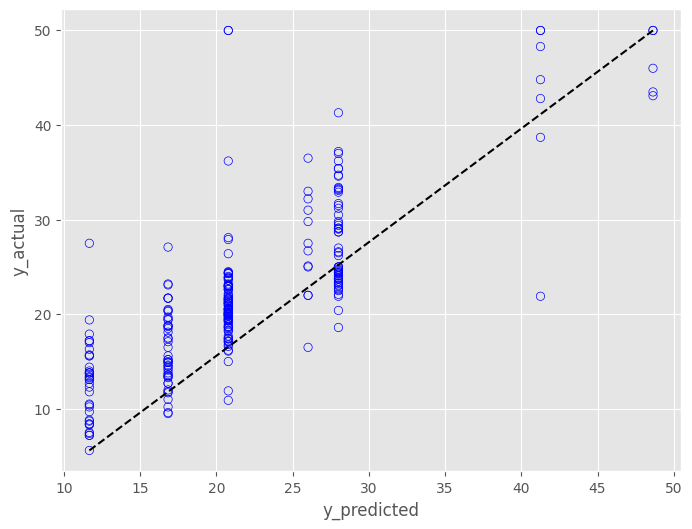

In [39]:
# Get the predictions from the tree for the test set
y_pred = tree_est.predict(X_test)

# Scatter plot the predicted versus actual values
fig,ax = plt.subplots(1,1, figsize=(8,6));
ax.scatter(y_pred, y_test, facecolor='None', edgecolor='b');
# add a reference unity line
ax.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], linestyle='--', color='k');
ax.set_xlabel('y_predicted')
ax.set_ylabel('y_actual')

# print the mse
print("Test MSE = ", np.mean((y_pred-y_test)**2))


# Random Forests - Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

# To build a random forest simply set the max features to be the sqrt of the number of features
forest = RandomForestRegressor(n_estimators=500, max_features=6, bootstrap=True, 
                               oob_score=True, random_state=0 )

forest_est = forest.fit(X_train, y_train)

In [48]:
# compute the forests predictions and test MSE
y_pred = forest_est.predict(X_test)

mse = np.mean((y_pred-y_test)**2)
print('Test MSE =', mse)

Test MSE = 16.227359950197656


The random forests method reduces the test MSE slightly compared with the bagging approach.

In [49]:
# Examine the feature importances
feature_importances = pd.Series(data=forest_est.feature_importances_, index=list(df.columns[0:-1]))
feature_importances = feature_importances.sort_values(axis=0, ascending=False)
feature_importances

lstat      0.382655
rm         0.323634
ptratio    0.054298
dis        0.048694
crim       0.047076
indus      0.042450
nox        0.037663
age        0.030084
tax        0.021805
rad        0.005612
chas       0.003026
zn         0.003003
dtype: float64

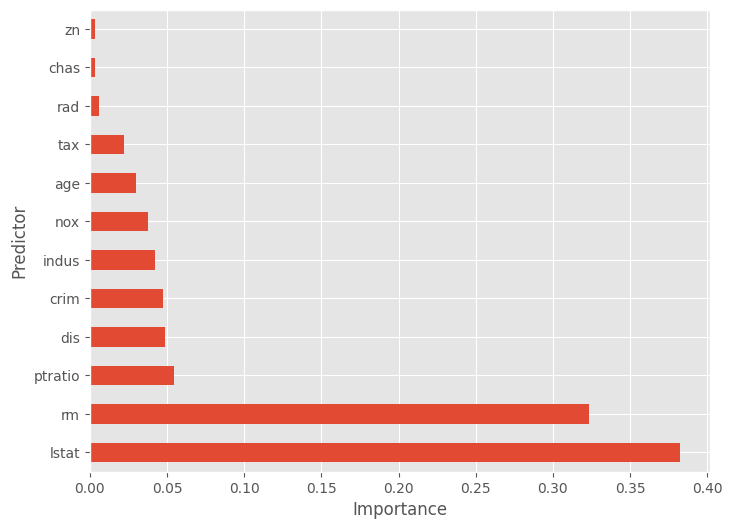

In [51]:
fig,ax1 = plt.subplots(1,1, figsize=(8,6))
feature_importances.plot(kind='barh', ax=ax1);
ax1.set_xlabel('Importance');
ax1.set_ylabel('Predictor');

Note: In sklearn the feature importances are the normalized reduction in the MSE brought about by that feature. 
We can visualize the feature importance in a bar plot and, in this case, we can see that the most important factors for predicting the median home value is the *lstat wealth* factor and the *number of rooms*.